Introduction

Here a dataset of books have been obtained from the Goodreads API. The objective is to use the historical books dataset to analyse and predict the average rating that users would give on a particular book 


Data Exploration

In [1]:
your_local_path = "D:/Premy/UPX/ML/Certification/"

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#Loading dataset into a dataframe
books_data_df = pd.read_csv(your_local_path + 'books1.csv')

In [4]:
books_data_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.78044E+12,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.78044E+12,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.78044E+12,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.78044E+12,eng,435,2149872,33964,NaN


In [300]:
books_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 11 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null object
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
# num_pages           13719 non-null object
ratings_count         13719 non-null int64
text_reviews_count    13719 non-null int64
Unnamed: 10           5 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


In [5]:
# Remove the unnamed column from the dataset
books_data_df.drop([books_data_df.columns[10]], axis='columns', inplace = True)
books_data_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.78044E+12,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.78044E+12,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.78044E+12,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.78044E+12,eng,435,2149872,33964


In [6]:
books_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null object
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
# num_pages           13719 non-null object
ratings_count         13719 non-null int64
text_reviews_count    13719 non-null int64
dtypes: int64(3), object(7)
memory usage: 1.0+ MB


In [7]:
books_data_df.drop([books_data_df.columns[7]], axis='columns', inplace = True)

In [8]:
books_data_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.78044E+12,eng,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.78044E+12,eng,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.78044E+12,eng,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.78044E+12,eng,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.78044E+12,eng,2149872,33964


In [9]:
# Checking null values in the dataset
books_data_df.isnull().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
ratings_count         False
text_reviews_count    False
dtype: bool

In [10]:
books_data_df.drop('isbn', axis='columns', inplace = True)

In [11]:
books_data_df.drop('isbn13', axis='columns', inplace = True)

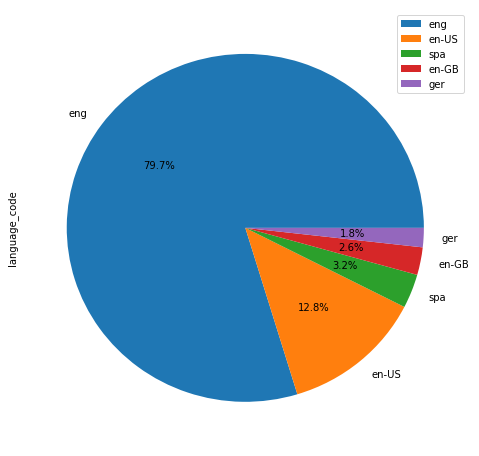

In [12]:
# top 5 languages
books_data_df['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

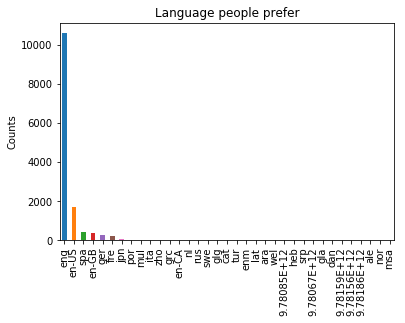

In [13]:
books_data_df['language_code'].value_counts().plot(kind='bar')
plt.title('Language people prefer')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

English books are preferred by many

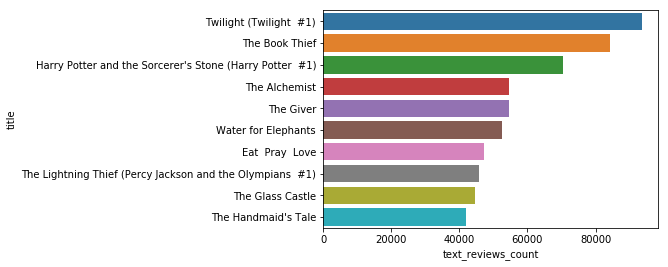

In [14]:
# highest reviewed books
highest_reviews = books_data_df.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])

From the graph, we can see a lot of people have given their reviews on the book Twilight

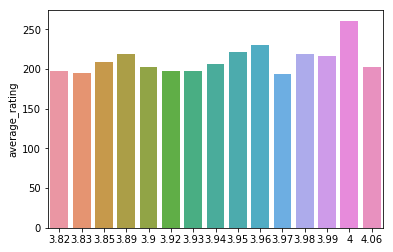

In [15]:
# number of books per rating
sns.barplot(books_data_df['average_rating'].value_counts().head(15).index, books_data_df['average_rating'].value_counts().head(15))

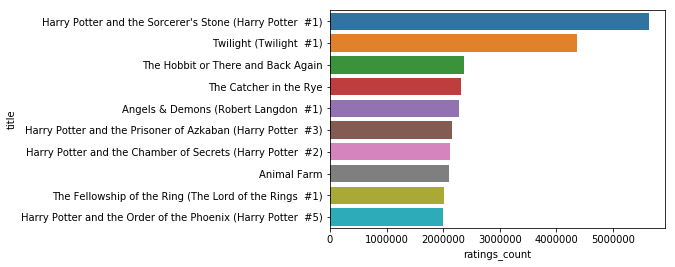

In [312]:
# Popular books
popular_books = books_data_df.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

Text(0.5,0,'Total Ratings')

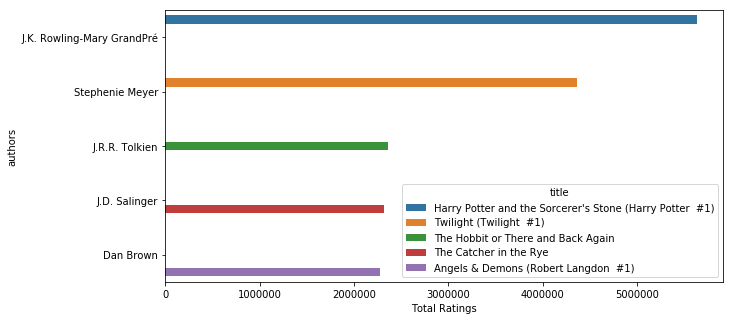

In [313]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
authors = books_data_df.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

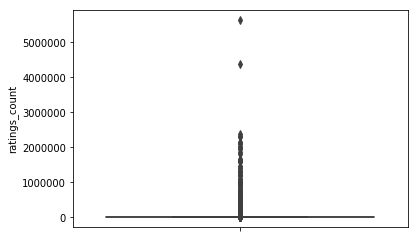

In [16]:
# find ratings count outliers
sns.boxplot(y=books_data_df['ratings_count'])

There are outliers in the ratings_count column which will affect the prediction.

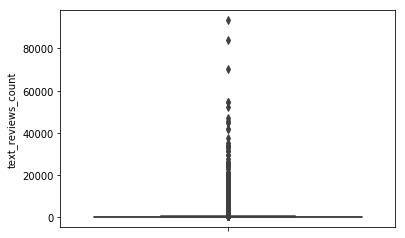

In [17]:
# find text reviews count outliers
sns.boxplot(y=books_data_df['text_reviews_count'])

In [18]:
# remove outliers from ratings_count
books_data_df = books_data_df.drop(books_data_df.index[books_data_df['ratings_count'] >= 1000000])


In [19]:
# remove outliers from text_reviews_count
books_data_df = books_data_df.drop(books_data_df.index[books_data_df['text_reviews_count'] >= 20000])

In [20]:
books_data_df

,bookID,title,authors,average_rating,language_code,ratings_count,text_reviews_count
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,6267,272
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,eng,38872,154
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,en-US,18,1
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,27410,820
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,3602,258
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,eng,240189,3954
10,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,eng,4416,408
11,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams-Stephen Fry,4.22,eng,1222,253
12,18,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Douglas Adams,4.38,en-US,2801,192
13,21,A Short History of Nearly Everything,Bill Bryson-William Roberts,4.2,eng,228522,8840


The columns title, authors and language_code have categorical variables. Need to convert these into numerical values before it can be used for any algorithms

In [21]:
# encode title column
le = preprocessing.LabelEncoder()
books_data_df['title'] = le.fit_transform(books_data_df['title'])

In [22]:
# encode authors column
le = preprocessing.LabelEncoder()
books_data_df['authors'] = le.fit_transform(books_data_df['authors'])

In [23]:
# encode language column
#enc_lang = pd.get_dummies(books_data_df['language_code'])
#books_data_df = pd.concat([books_data_df, enc_lang], axis = 1)

# encode authors column
le = preprocessing.LabelEncoder()
books_data_df['language_code'] = le.fit_transform(books_data_df['language_code'])

In [24]:
books_data_df.head()

,bookID,title,authors,average_rating,language_code,ratings_count,text_reviews_count
3,4,3714,3015,4.41,12,6267,272
5,8,3708,3021,4.78,12,38872,154
6,9,11637,7224,3.69,11,18,1
7,10,3710,3015,4.73,12,27410,820
8,12,10966,1677,4.38,12,3602,258


In [30]:
books_data_df["average_rating"] = pd.to_numeric(books_data_df["average_rating"],errors='coerce')

In [31]:
books_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13672 entries, 3 to 13718
Data columns (total 7 columns):
bookID                13672 non-null int64
title                 13672 non-null int64
authors               13672 non-null int64
average_rating        13667 non-null float64
language_code         13672 non-null int64
ratings_count         13672 non-null int64
text_reviews_count    13672 non-null int64
dtypes: float64(1), int64(6)
memory usage: 1.5 MB


In [37]:
books_data_df.isnull().any()

bookID                False
title                 False
authors               False
average_rating         True
language_code         False
ratings_count         False
text_reviews_count    False
dtype: bool

In [39]:
books_data_df = books_data_df.dropna(axis = 0, how ='any')

In [40]:
books_data_df.head()

,bookID,title,authors,average_rating,language_code,ratings_count,text_reviews_count
3,4,3714,3015,4.41,12,6267,272
5,8,3708,3021,4.78,12,38872,154
6,9,11637,7224,3.69,11,18,1
7,10,3710,3015,4.73,12,27410,820
8,12,10966,1677,4.38,12,3602,258


In [41]:
books_data_df.isnull().any()

bookID                False
title                 False
authors               False
average_rating        False
language_code         False
ratings_count         False
text_reviews_count    False
dtype: bool

In [42]:
# divide the data into attributes and labels
X = books_data_df.drop(['average_rating'], axis = 1)
y = books_data_df['average_rating']

In [43]:
books_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13667 entries, 3 to 13718
Data columns (total 7 columns):
bookID                13667 non-null int64
title                 13667 non-null int64
authors               13667 non-null int64
average_rating        13667 non-null float64
language_code         13667 non-null int64
ratings_count         13667 non-null int64
text_reviews_count    13667 non-null int64
dtypes: float64(1), int64(6)
memory usage: 854.2 KB


In [44]:
books_data_df.head()

,bookID,title,authors,average_rating,language_code,ratings_count,text_reviews_count
3,4,3714,3015,4.41,12,6267,272
5,8,3708,3021,4.78,12,38872,154
6,9,11637,7224,3.69,11,18,1
7,10,3710,3015,4.73,12,27410,820
8,12,10966,1677,4.38,12,3602,258


In [46]:
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print(linreg.intercept_)
print(linreg.coef_)

3.887200240324016
[-1.00234567e-06  2.86561064e-06  1.62147850e-06  3.01187647e-03
  4.51579651e-07 -5.89394352e-06]


In [ ]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [49]:
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.33022031126366913

Now we will get the Null RMSE. Null RMSE is the benchmark against which we have to measure the regression model

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 123)
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())


In [54]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.34858824037067937

Lower values of RMSE indicate better fit.
Compare RMSE with null RMSE. Your model RMSE should be less than this null RMSE. If it is less, it indicates your model is good